TO-DO list
===
* ~~Plot percentages of missing values~~
* ~~Plot ratings/prices/scores over time series~~
* ~~Plot binary/discrete values~~
* ~~Look at scater plot and identify correlations~~
* Calculate and plot Position Bias, rank of click/booking bias
* Rank of exp(prop log historical price) - price usd
* ~~Try random forest classifier~~
* Try Regression
* Try SVM-Rank
* Try LambdaMART
* OneHotEncoding for our categorical features

In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
# load data, parse date
#training=pd.read_csv('training_set_VU_DM_2014.csv',parse_dates=['date_time'])
#test=pd.read_csv('test_set_VU_DM_2014.csv', parse_dates=['date_time'])

training=pd.read_csv('/Users/theofpa/.kaggle/competitions/expedia-personalized-sort/train.csv',parse_dates=['date_time'])
test=pd.read_csv('/Users/theofpa/.kaggle/competitions/expedia-personalized-sort/test.csv',parse_dates=['date_time'])

In [41]:
# How many number of searches do we have in our train/test dataset?
print("training: ",training.srch_id.unique().size)
print("test: ",test.srch_id.unique().size)
print("combined: ",pd.concat([training,test]).srch_id.unique().size)

training:  199795
test:  199549
combined:  279430


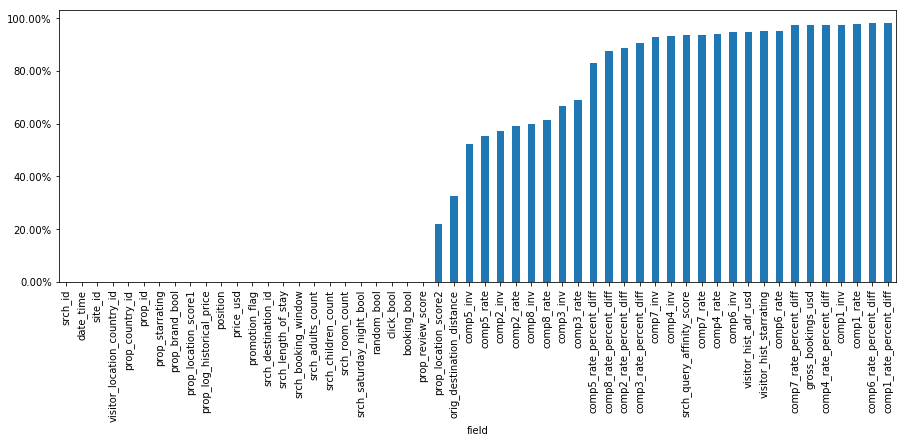

In [42]:
# How many values are missing?
missing=[]
for i in training:
    missing.append({'field':i,'percent':len(training[training[i].isnull()])/training.shape[0]})
miss=pd.DataFrame(sorted(missing, key=lambda k: k['percent']))
plt.rcParams["figure.figsize"]=[15,5]
ax=miss.plot.bar(x='field',y='percent',legend=None)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]);

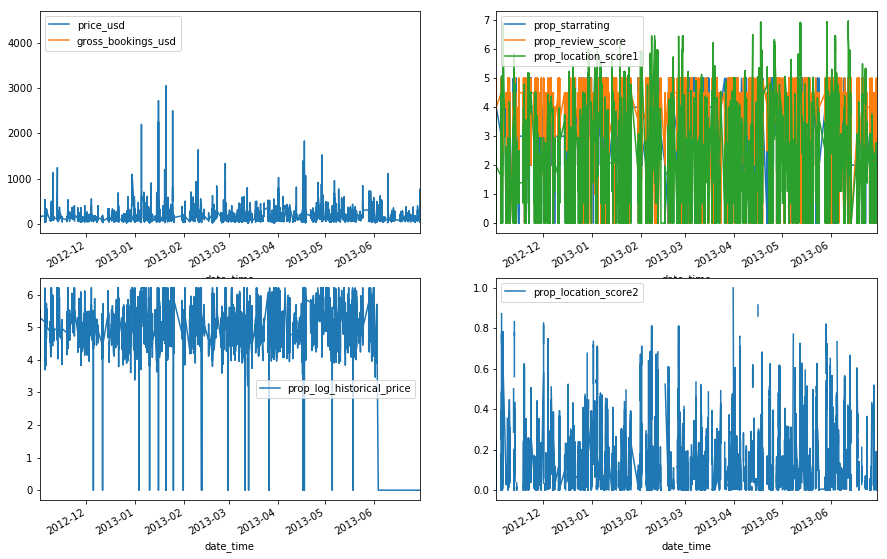

In [32]:
# datetime histogram of prices & scores
plt.rcParams["figure.figsize"]=[15,10]
fig, axes = plt.subplots(nrows=2, ncols=2)
size=10000
training[:size].plot(x='date_time',y='price_usd',ax=axes[0,0])
training[:size].plot(x='date_time',y='gross_bookings_usd',ax=axes[0,0])

training[:size].plot(x='date_time',y='prop_starrating',ax=axes[0,1])
training[:size].plot(x='date_time',y='prop_review_score',ax=axes[0,1])
training[:size].plot(x='date_time',y='prop_location_score1',ax=axes[0,1])

training[:size].plot(x='date_time',y='prop_log_historical_price',ax=axes[1,0])

training[:size].plot(x='date_time',y='prop_location_score2',ax=axes[1,1]);

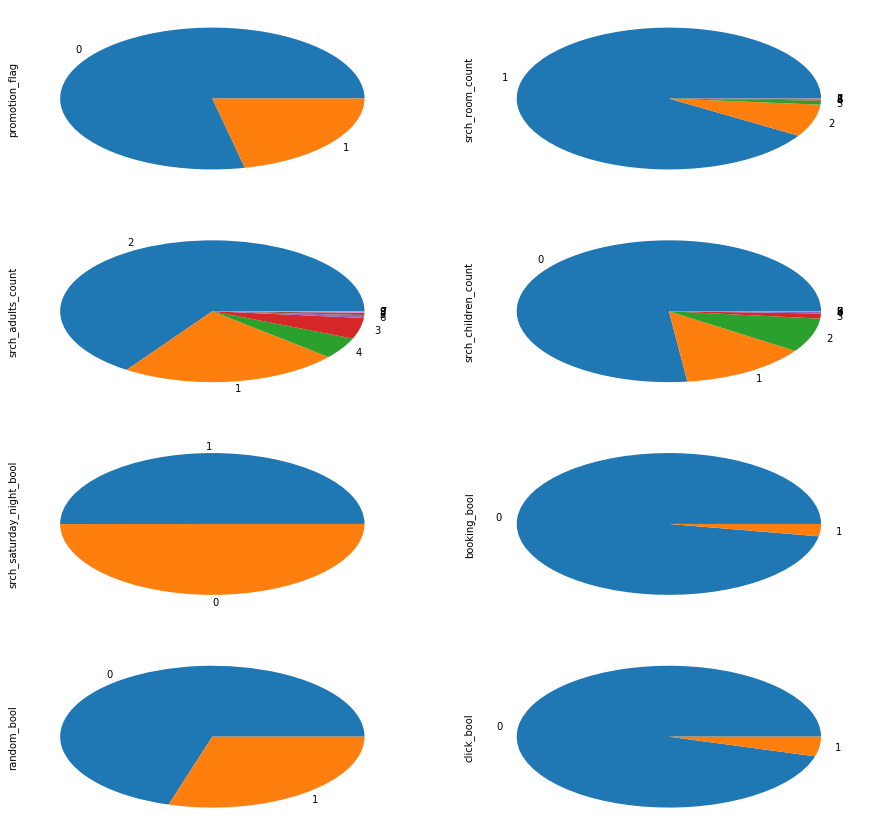

In [10]:
# plot bools
plt.rcParams["figure.figsize"]=[15,15]
fig, axes = plt.subplots(nrows=4, ncols=2)

training.promotion_flag.value_counts().plot.pie(ax=axes[0,0])
training.srch_room_count.value_counts().plot.pie(ax=axes[0,1])
training.srch_adults_count.value_counts().plot.pie(ax=axes[1,0])
training.srch_children_count.value_counts().plot.pie(ax=axes[1,1])
training.srch_saturday_night_bool.value_counts().plot.pie(ax=axes[2,0])
training.booking_bool.value_counts().plot.pie(ax=axes[2,1])
training.random_bool.value_counts().plot.pie(ax=axes[3,0])
training.click_bool.value_counts().plot.pie(ax=axes[3,1]);

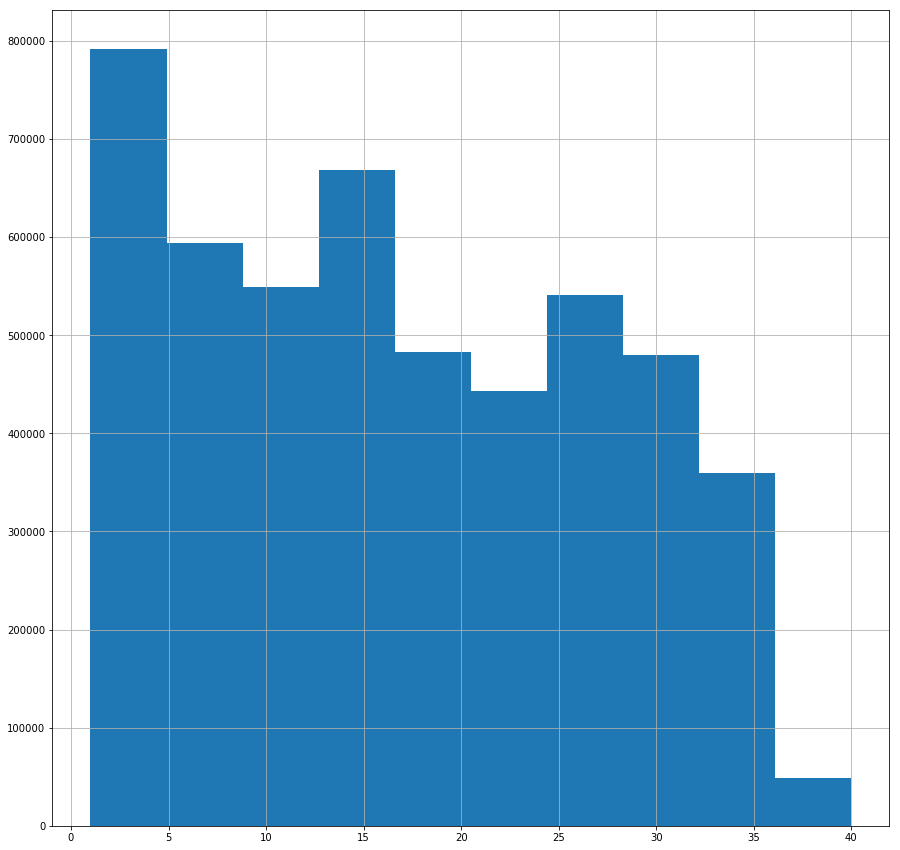

In [9]:
training.position.hist()

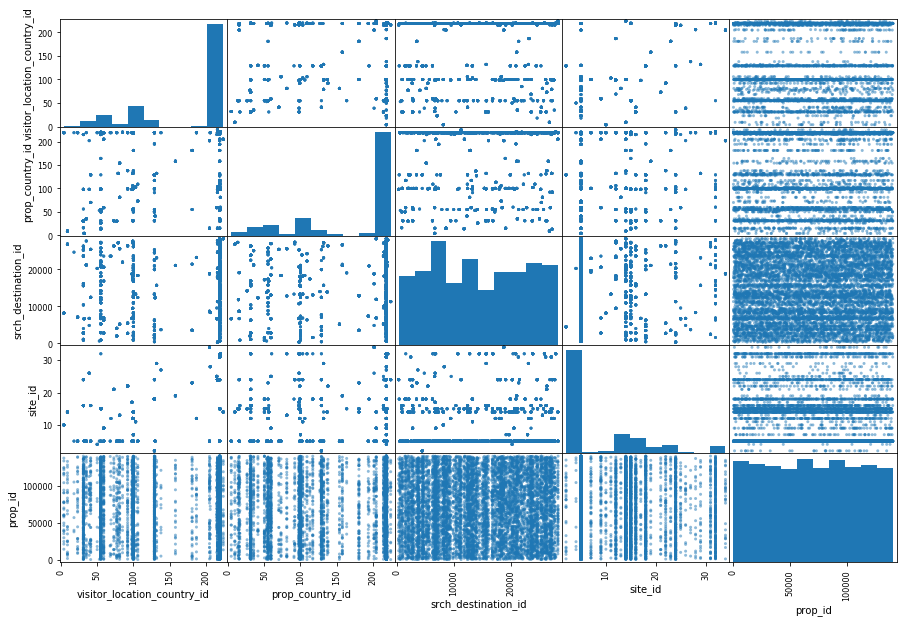

In [10]:
# compare the IDs
plt.rcParams["figure.figsize"]=[15,10]
scatter_matrix(training[:size][['visitor_location_country_id','prop_country_id','srch_destination_id','site_id','prop_id']]);

In [11]:
# Correlation between visitor & property country id
training.visitor_location_country_id.corr(training.prop_country_id)

0.48278697988865854

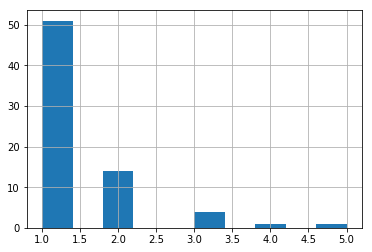

In [30]:
#train["prop_review_score"].value_counts().plot(kind='barh', color="blue", alpha=.7, figsize=(16, 6))
#plt.scatter(train['prop_log_historical_price'], np.random.randn(len(train['prop_log_historical_price'])), s=10)
train["prop_log_historical_price"].value_counts().hist()


In [4]:
# feature engineering
gross=train[train['gross_bookings_usd'].notnull()]
# tax = gross - ( price * nights )
gross['tax']=gross.gross_bookings_usd-(gross.price_usd*gross.srch_length_of_stay)
gross[gross['tax']>0].groupby('prop_country_id').mean()['tax'].sort_values(ascending=False).head()

NameError: name 'train' is not defined

In [13]:
classifier = RandomForestClassifier(n_estimators=100,
                                        verbose=2,
                                        n_jobs=-1,
                                        min_samples_split=10,
                                        random_state=1)

In [5]:
training=training.fillna(value=0)
test=test.fillna(value=0)

training['weekday']=pd.to_datetime(training['date_time']).dt.weekday
test['weekday']=pd.to_datetime(test['date_time']).dt.weekday

feature_names = list(training.columns)
feature_names.remove("click_bool")
feature_names.remove("booking_bool")
feature_names.remove("gross_bookings_usd")
feature_names.remove("date_time")
feature_names.remove("position")
#features=training[feature_names].values
#testfeatures=test[feature_names].values
#target=training['booking_bool'].values

In [12]:
import joblib
joblib.dump(training,'training.pkl')
joblib.dump(test,'test.pkl')

['test.pkl']

In [14]:
classifier.fit(training[feature_names].values, training['booking_bool'].values)

building tree 5 of 50building tree 4 of 50building tree 1 of 50building tree 2 of 50building tree 3 of 50building tree 7 of 50building tree 8 of 50building tree 6 of 50







building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 11.1min


building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 18.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=1, verbose=2, warm_start=False)

In [15]:
predictions=classifier.predict_proba(test[feature_names].values)

[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   20.9s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:   34.9s finished


In [16]:
submission=pd.concat([test[['srch_id','prop_id']], pd.DataFrame.from_records(predictions)], axis=1, names=['a','b','c','d'])
submission=submission.rename(columns={'srch_id':'SearchId', 'prop_id':'PropertyId'})
submission=submission.sort_values(['SearchId',0],ascending=True)[['SearchId','PropertyId',0]]
submission.to_csv('RF1-submission.csv',columns=['SearchId','PropertyId'], index=None)

[None, None, None, None, None, None, None, None, None, None, None, None]

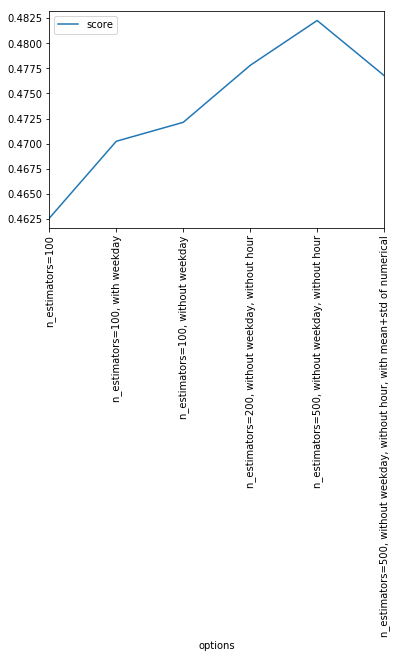

In [19]:
# input from our kaggle submissions
pd.DataFrame({"options": ["n_estimators=100","n_estimators=100, with weekday", "n_estimators=100, without weekday", "n_estimators=200, without weekday, without hour", "n_estimators=500, without weekday, without hour", "n_estimators=500, without weekday, without hour, with mean+std of numerical"], "score": [0.46255,0.47023,0.47212, 0.47781, 0.48229, 0.47679]}).set_index('options').plot()
locs, labels = plt.xticks()
plt.setp(labels, rotation=90);